In [1]:
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline 
import xarray as xr

In [2]:
H = 50
rdays = 2
rs = 1/(rdays*24*3600)
beta = 2.0*2.0*np.pi/(24*3600)
rho = 1030
Rearth = 6.371e6
MperD = Rearth * np.pi / 180

In [3]:
url = 'http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/\
.PROJECTS/.TCC/.INC_ERA/trend.nc/dods'

In [4]:
ds = xr.open_dataset(url)

In [5]:
#Subset the domain
dss = ds.sel(X=slice(119,281),Y=slice(-20,20))
#calculate coriolis 
fcor =  beta * np.sin(np.pi * dss.Y / 180)

In [6]:
det = (fcor*fcor + rs*rs)*rho*H

us = (rs*dss.taux + fcor*dss.tauy)/det
vs = (rs*dss.tauy - fcor*dss.taux)/det

In [7]:
dx = MperD
dy = MperD/2

[su,tu] = np.gradient(us)
dudx = tu/dx
[sv,tv] = np.gradient(vs)
dvdy = sv/dy
ws = H * (dudx + dvdy)

In [8]:
# Define the new Dataset
dsu = xr.Dataset({'X': ('X', dss.X), 'Y': ('Y', dss.Y), \
'taux': (['Y','X'], dss.taux),'tauy': (['Y','X'], dss.tauy), \
'us': (['Y','X'], us),'vs': (['Y','X'], vs), 'ws': (['Y','X'], ws)})
dsu.X.attrs = ds.X.attrs; dsu.Y.attrs = ds.Y.attrs
dsu.us.attrs = [('units','m/s')]
dsu.vs.attrs = [('units','m/s')]
dsu.ws.attrs = [('units','m/s')]
dsu.taux.attrs = [('units','Nm2')]
dsu.tauy.attrs = [('units','Nm2')]
dsu.to_netcdf('data/uvws-trend.nc')

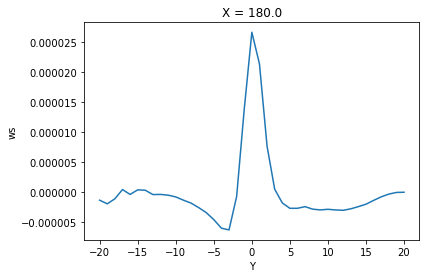

In [9]:
dsu.ws.sel(X=180, method='nearest').plot()